# Dropout

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from pylab import rcParams
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles,make_moons
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout

In [2]:
np.set_printoptions(suppress=True)
zeros_one_colourmap = ListedColormap(('green','orange'))
rcParams['figure.figsize'] = 14,7
np.random.seed(8)

In [3]:
no_of_points = 20  #Total 20 data points used

In [4]:
X_train = np.linspace(-1,1,no_of_points)

In [5]:
y_train= np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [6]:
X_test = np.linspace(-1,1,no_of_points)

In [7]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

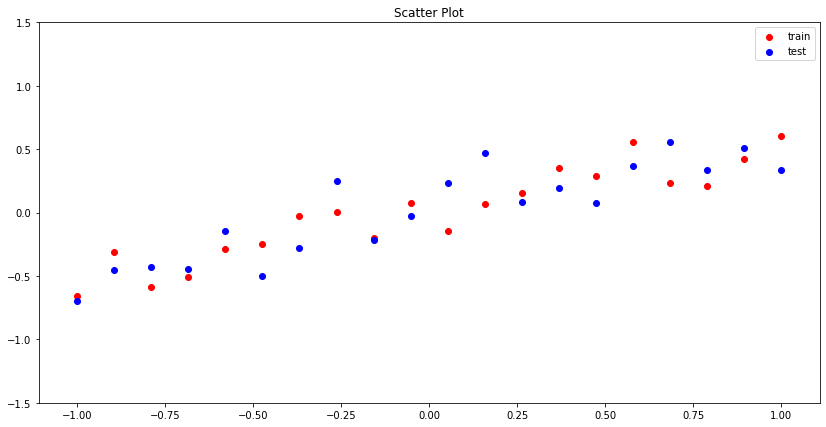

In [24]:
plt.figure()
plt.scatter(X_train,y_train,c='red',label='train')
plt.scatter(X_test,y_test,c='blue',label='test')
plt.legend()
plt.title("Scatter Plot")
plt.ylim((-1.5, 1.5))
plt.show()

In [25]:
hidden_unit=128

In [26]:
# Neural network with 2 hidden unit and 128 neuron each.
model_1 = Sequential()
model_1.add(Dense(hidden_unit,input_dim=1,activation='relu'))
model_1.add(Dense(hidden_unit,activation='relu'))
model_1.add(Dense(1,activation='linear'))
adam = Adam(learning_rate=0.01)   # Adam optimizer is used with 0.01 learning rate
model_1.compile(loss="mse",optimizer=adam,metrics=['mse']) # Mean squared error is used as loss
history = model_1.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=False)

In [11]:
_, train_mse = model_1.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_1.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.004, Test: 0.046


In [12]:
y_pred_1 = model_1.predict(X_test)

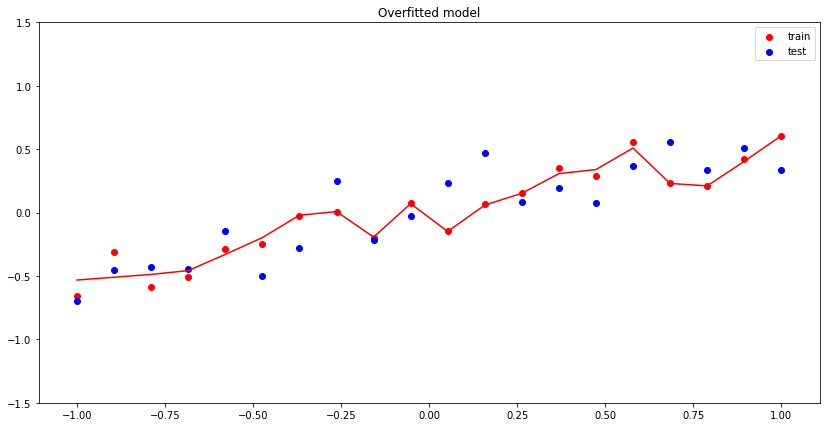

In [27]:
plt.figure()
plt.scatter(X_train,y_train,c='red',label='train')
plt.scatter(X_test,y_test,c='blue',label='test')
plt.plot(X_test,y_pred_1,c='red')
plt.legend()
plt.title("Overfitted model")
plt.ylim((-1.5, 1.5))
plt.show()

# Dropout

In [32]:
# dropping 50% of hidden neuron 
model_2 = Sequential()
model_2.add(Dense(hidden_unit,input_dim=1,activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(hidden_unit,activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(1,activation='linear'))
adam = Adam(learning_rate=0.01)
model_2.compile(loss="mse",optimizer=adam,metrics=['mse'])
model_2_history = model_2.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=False)

In [33]:
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.014, Test: 0.037


In [34]:
y_pred_2 = model_2.predict(X_test)

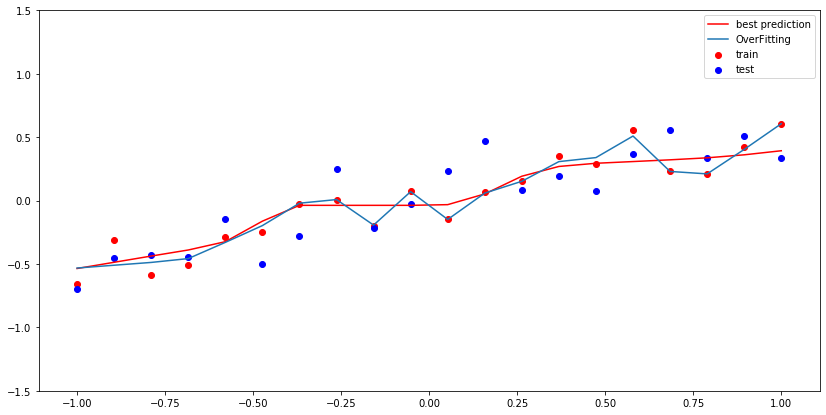

In [35]:
plt.figure()
plt.scatter(X_train,y_train,c='red',label='train')
plt.scatter(X_test,y_test,c='blue',label='test')
plt.plot(X_test,y_pred_2,c='red',label='best prediction')
plt.plot(X_test,y_pred_1,label='OverFitting')
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()